In [1]:
import ebisim as eb
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
# os.environ["NUMBA_DISABLE_INTEL_SVML"] = "1"
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100
# eb.simulation._advanced.compile_adv_model()

print(os.environ.get("NUMBA_DISABLE_INTEL_SVML", "Not set"))

Not set


In [2]:
ar = eb.Target.get_gas("Ar", 5e-11, 5e-3)
dev = eb.Device.get(current=1, e_kin=9700, r_e=1e-4, length=0.8, v_ax=200, b_ax=2, r_dt=0.005, n_grid=500,)

In [3]:
TMAX = 4#3.504
# T0 = 0.0001
ares = eb.advanced_simulation(
    dev, ar,TMAX,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True,IONISATION_HEATING=True),
    solver_kwargs={"method":"Radau", "dense_output":True, },# "atol":1e-8},
    rates=True, n_threads=4
)
# kr= eb.advanced_simulation(
#     dev, [k, ],TMAX,
#     options=eb.ModelOptions(RADIAL_DYNAMICS=True),
#     solver_kwargs={"method":"Radau","dense_output":True, "max_step":.01, "min_step":1e-8},
#     rates=True,
# )


Initial temperature vector adjusted for Element: Argon (Ar, Z = 18, A = 40). This only affects charge states with densities at the minimum limit.



Integration finished: 4979 calls                    
The solver successfully reached the end of the integration interval.
Calls: 4979 of which ~1787 normal (35.89%) and ~3192 for jacobian approximation (64.11%)
Rates finished: 185 rates


/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:488: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


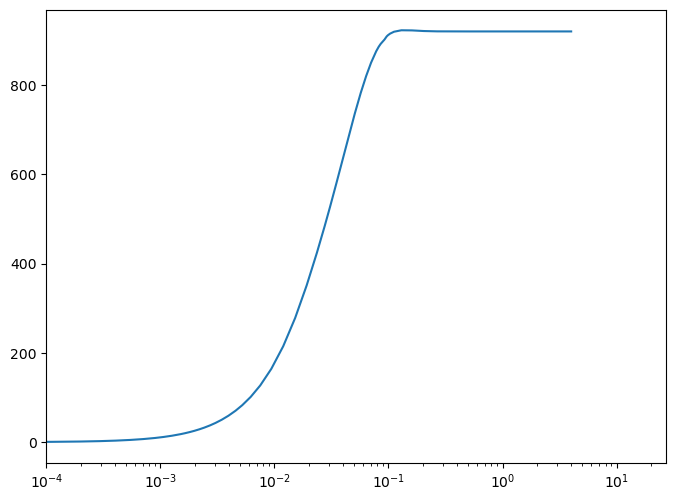

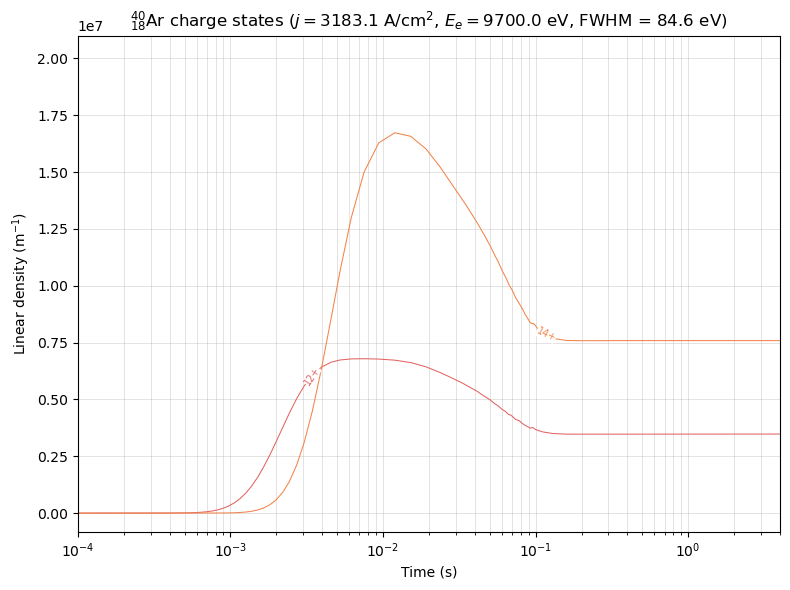

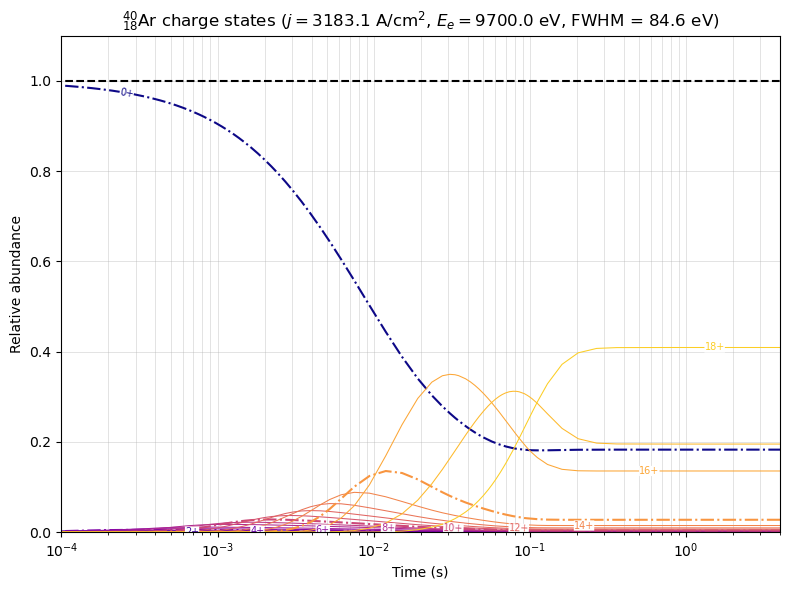

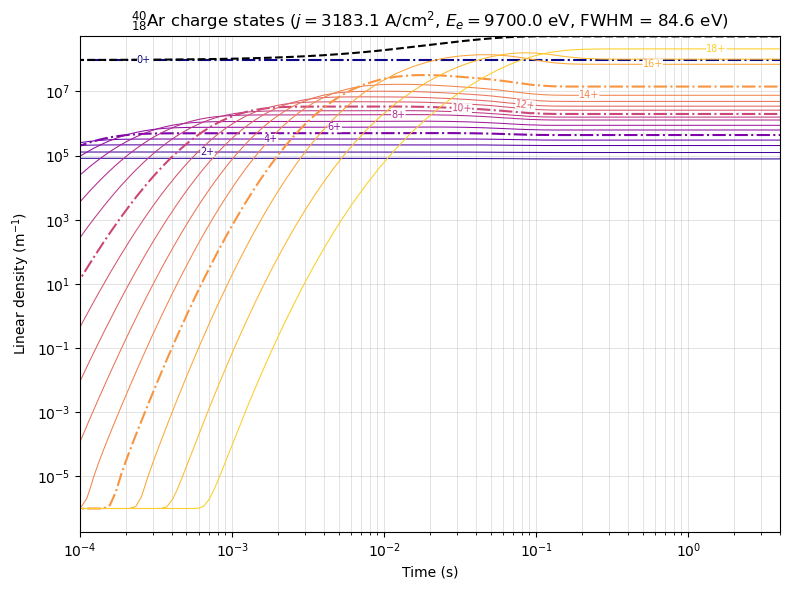

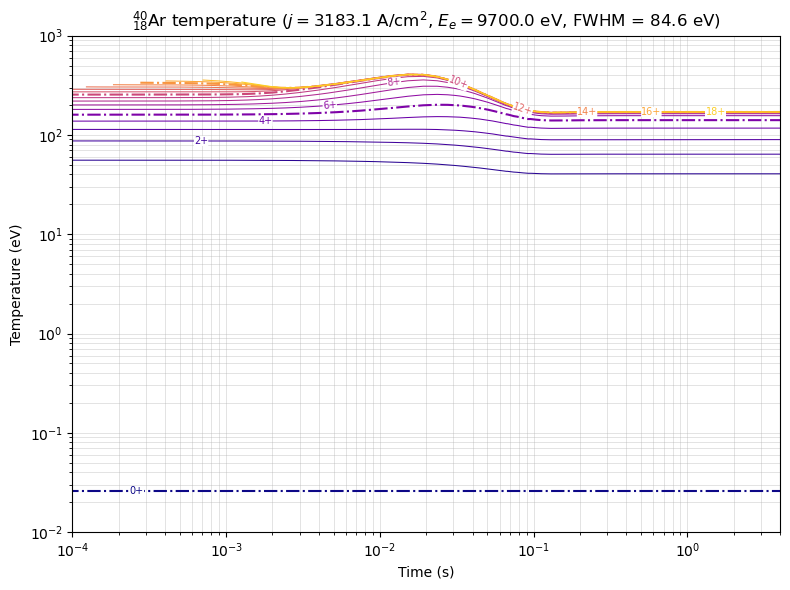

In [4]:
fig,ax = plt.subplots()
ax.semilogx(1*ares.t, np.sum(ares.model.q * ares.N.T, axis=-1)*eb.Q_E*1e12*.8)
ax.set_xlim(1e-4,None)
ares.plot_charge_states(cs=[12,14], plot_total=False, ylim=(None, .21e8))
ares.plot_charge_states(relative=True)
ares.plot_charge_states(relative=False, yscale="log")
_=ares.plot_temperature()#dens_threshold=0)

# ?eb.plotting.plot_generic_evolution

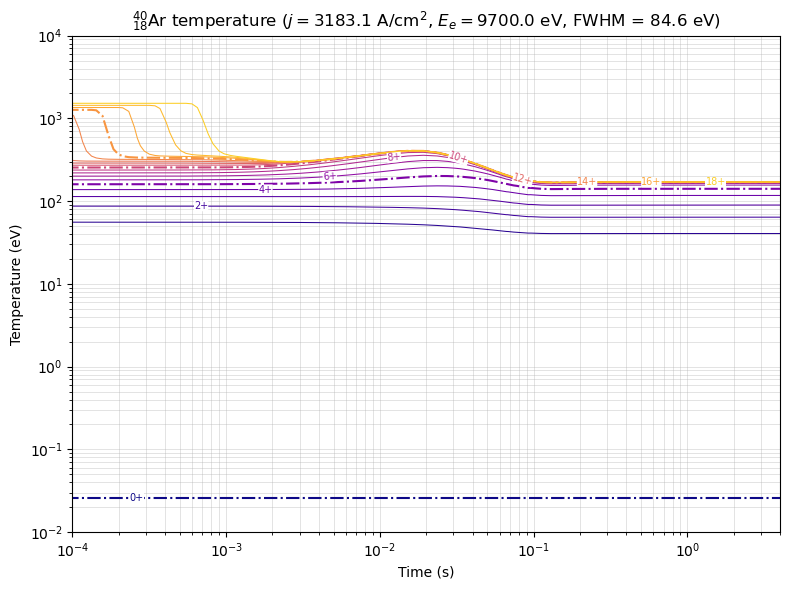

In [5]:
ares.plot_temperature(dens_threshold=0);

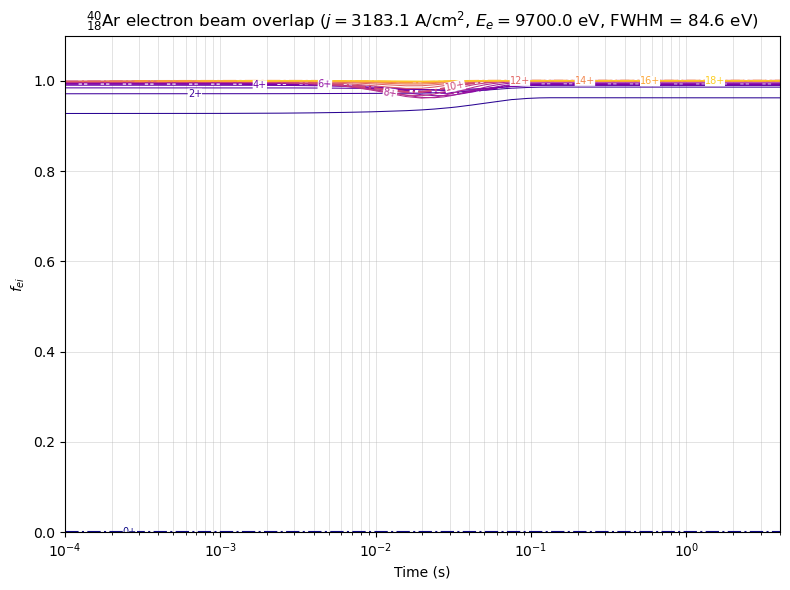

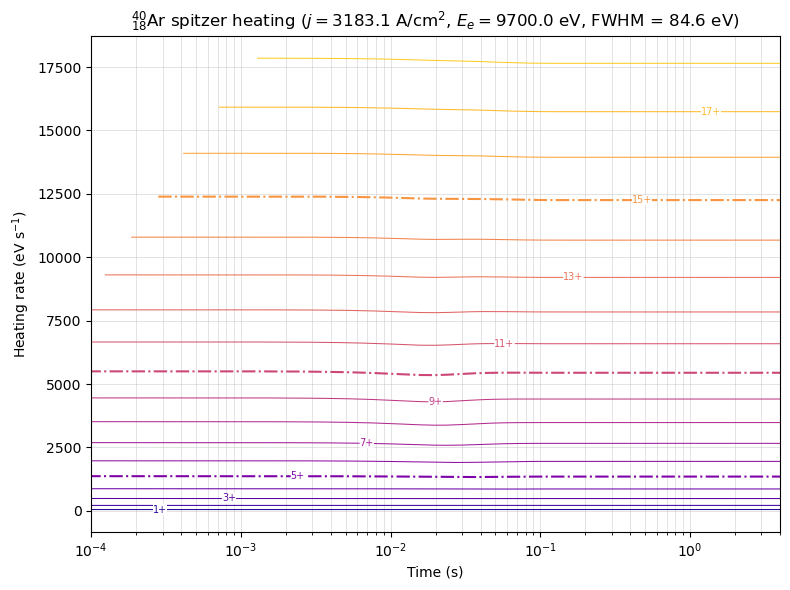

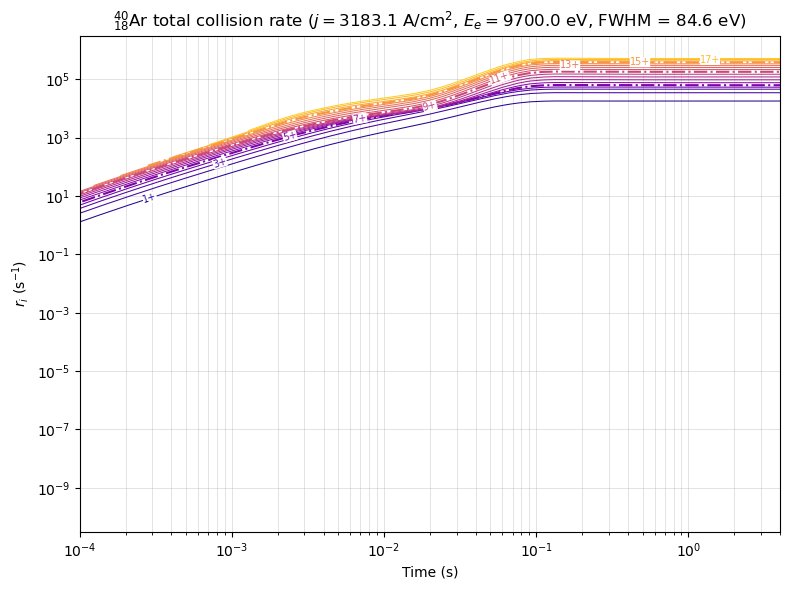

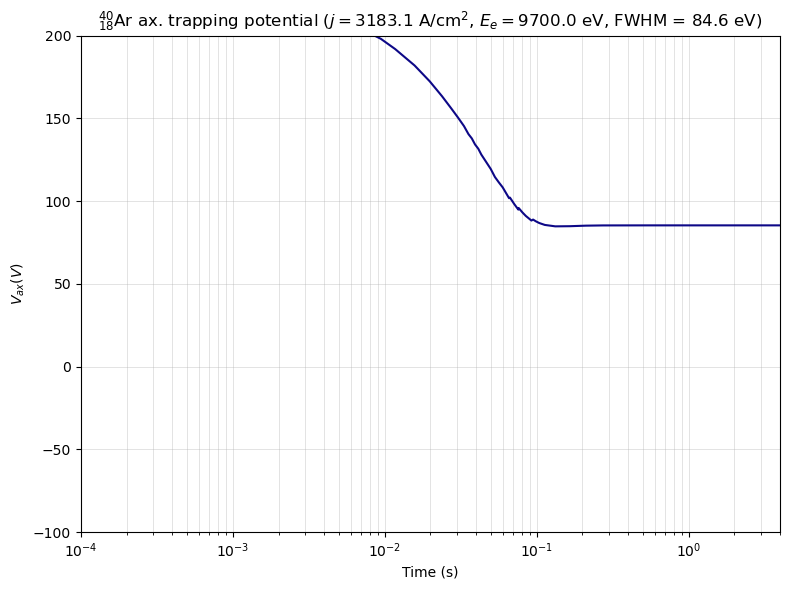

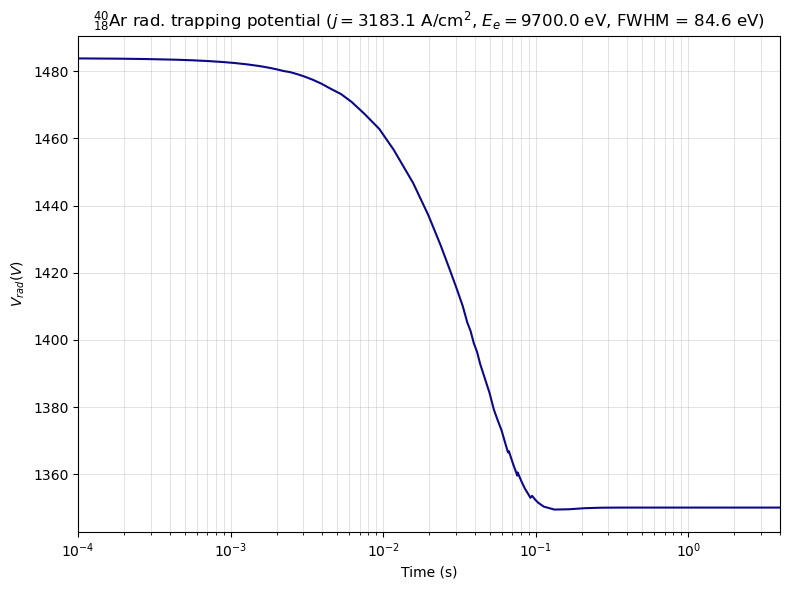

In [6]:
_=ares.plot_rate(eb.Rate.F_EI);
_=ares.plot_rate(eb.Rate.SPITZER_HEATING);
_=ares.plot_rate(eb.Rate.COLLISION_RATE_TOTAL, yscale="log");
_=ares.plot_rate(eb.Rate.V_AX, ylim=(-100,200),yscale="linear");
# plt.ylim=(-100,200)
_=ares.plot_rate(eb.Rate.V_RA);
# plt.plot(ares.t, ares.rates[eb.Rate.V_AX].T);
# plt.show()

0.0
0.0


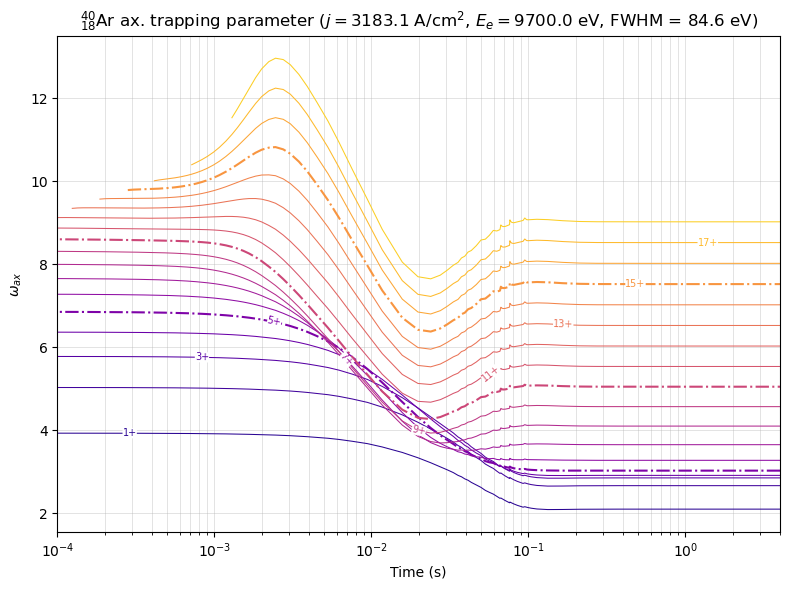

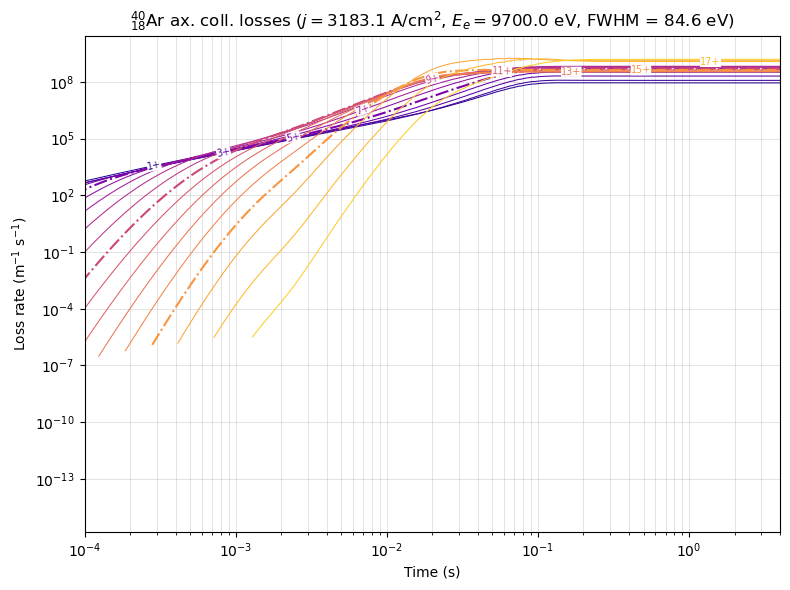

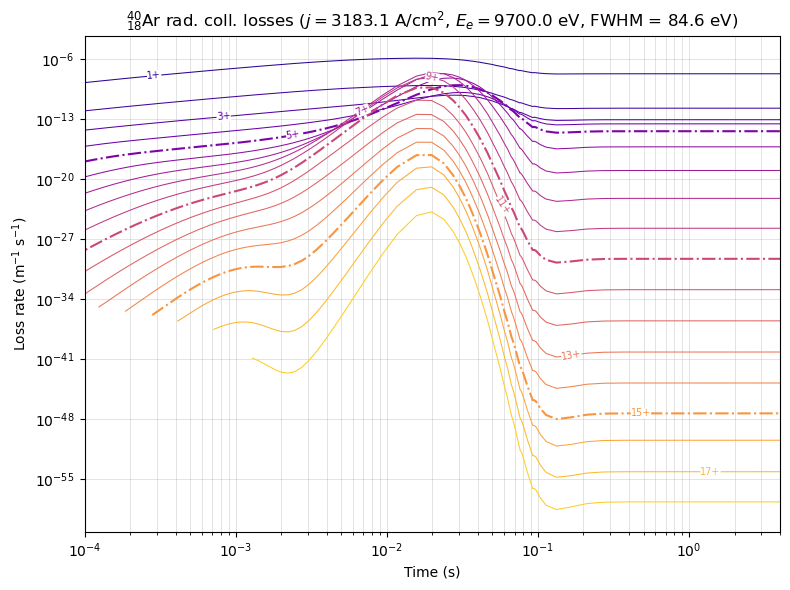

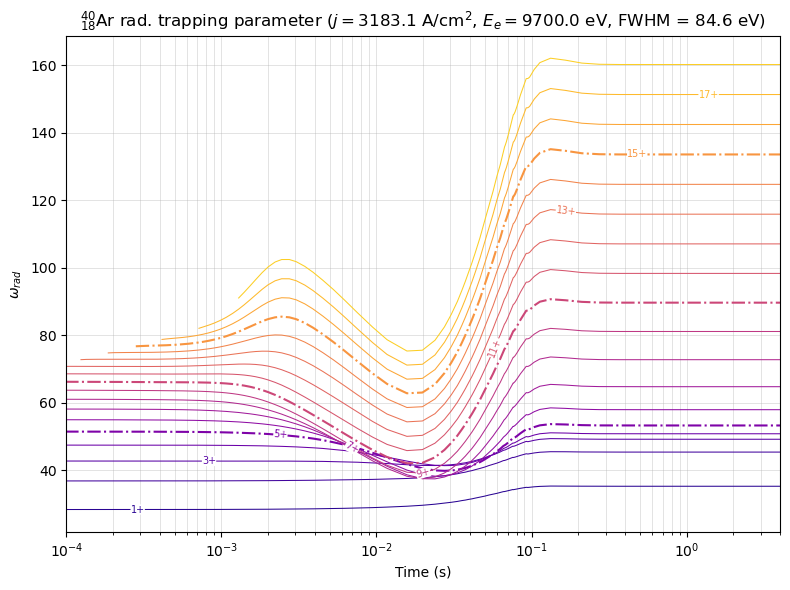

In [7]:
print(ares.rates[eb.Rate.LOSSES_AXIAL_COLLISIONAL].min())
print(ares.rates[eb.Rate.LOSSES_RADIAL_COLLISIONAL].min())
ares.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, yscale="linear", );
ares.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, yscale="log");
ares.plot_rate(eb.Rate.LOSSES_RADIAL_COLLISIONAL, yscale="log");

ares.plot_rate(eb.Rate.TRAPPING_PARAMETER_RADIAL);

(<AxesSubplot:title={'center':'$\\mathsf{^{40}_{18}Ar}$ radial distribution at t = 1000.0 ms ($j = 3183.1$ A/cm$^2$, $E_{e} = 9700.0$ eV, FWHM = 84.6 eV)'}, xlabel='Radius (m)', ylabel='Density (m$^{-3}$)'>,
 <AxesSubplot:label='7b252590-7933-49a5-bbbb-a4fcb5ca6eb2', ylabel='Radial potential (V)'>)

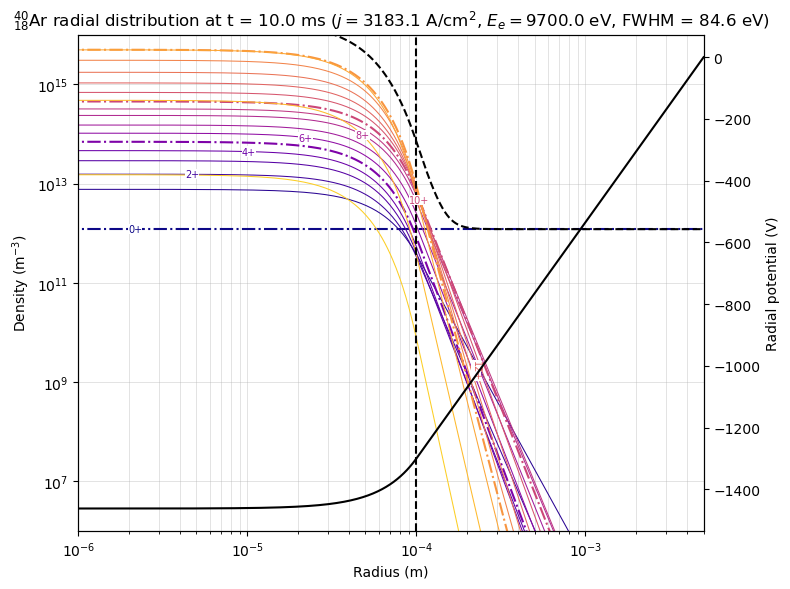

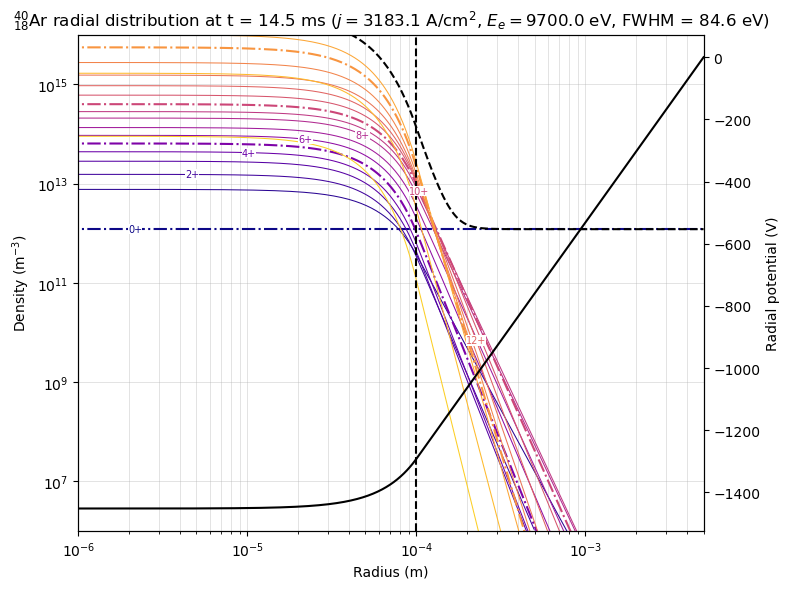

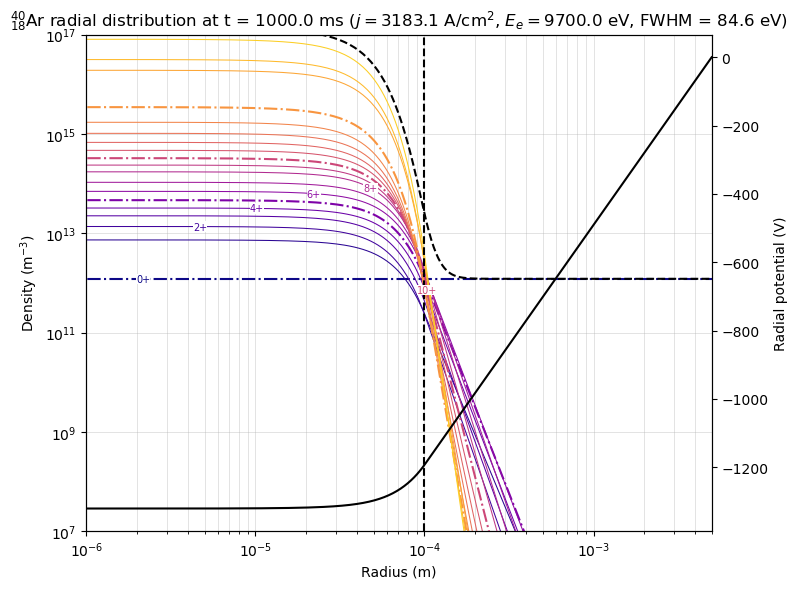

In [8]:
ares.plot_radial_distribution_at_time(0.01)
ares.plot_radial_distribution_at_time(0.0145)
ares.plot_radial_distribution_at_time(1.0)
